#                               Diamonds Price Predict

### Introduction

This dataset is about Diamonds, We will perform a regression model to predict the price.

### Our goal is to answer the following questions:

- How to create a regression model to predict the price of diamonds?
- what is the best model to predict the price of diamonds?

### Initially importing some of the necessary libraries:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

%matplotlib inline 


### Web Scraping

In [33]:
file_url = "https://www.kaggle.com/shivam2503/diamonds"
r = requests.get(file_url)
r

<Response [200]>

In [34]:
soup = bs(r.content)
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Diamonds | Kaggle
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow" name="robots"/>
  <meta content="Analyze diamonds by their cut, color, clarity, price, and other attributes" name="description"/>
  <meta content="no-cache" name="turbolinks-cache-control"/>
  <meta content="clothing and accessories,finance" name="keywords"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0" name="viewport"/>
  <meta content="#008ABC" name="theme-color"/>
  <script nonce="5xrRQNfGOL2+qR7K3O0Nfw==" type="text/javascript">
   window["pageRequestStartTime"] = 1638994172126;
    window["pageRequestEndTime"] = 1638994172289;
    window["initialPageLoadStartTime"] = new Date().getTime();
  </script>
  <link crossorigin="anonymous" href="https://www.google-analytics.com" rel="preconnect"/>
  <link href="https://stats.g.doubleclick.net" rel="preconnect"/>
  <link href="https://storage.googleapis

### Importing the dataset

In [35]:
#Importing Data
DF = pd.read_csv('diamonds.csv')
DF

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Data Structure

In [36]:
DF.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [37]:
DF.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [38]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Data Cleaning

In [39]:
DF = DF.drop(['Unnamed: 0','depth','table','x','y','z'],axis=1)
DF.head(3)

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327


In [40]:
DF.dtypes

carat      float64
cut         object
color       object
clarity     object
price        int64
dtype: object

In [41]:
#Checking for Null values by showing the total null values for each column
DF.isnull().sum()

carat      0
cut        0
color      0
clarity    0
price      0
dtype: int64

###### No null data.. it is good to go ✓

In [42]:
DF['price']=DF.price.astype(float)
DF.dtypes

carat      float64
cut         object
color       object
clarity     object
price      float64
dtype: object

In [43]:
l1=LabelEncoder()
lable =l1.fit_transform(DF['cut'])
DF['cut_lable']=lable
l1.classes_

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [44]:
lable

array([2, 3, 1, ..., 4, 3, 2])

In [45]:
DF.head(2)

,carat,cut,color,clarity,price,cut_lable
0,0.23,Ideal,E,SI2,326.0,2
1,0.21,Premium,E,SI1,326.0,3


In [46]:
l2=LabelEncoder()
lable1 =l2.fit_transform(DF['clarity'])
DF['clarity_lable']=lable1
DF.head(2)


,carat,cut,color,clarity,price,cut_lable,clarity_lable
0,0.23,Ideal,E,SI2,326.0,2,3
1,0.21,Premium,E,SI1,326.0,3,2


In [47]:
DF['color']=DF['color'].map({'D':1, 'E':2, 'F':3,'G':4,'H':5,'I':6, 'J':7, 'NA':8})

In [48]:
DF.head()

,carat,cut,color,clarity,price,cut_lable,clarity_lable
0,0.23,Ideal,2,SI2,326.0,2,3
1,0.21,Premium,2,SI1,326.0,3,2
2,0.23,Good,2,VS1,327.0,1,4
3,0.29,Premium,6,VS2,334.0,3,5
4,0.31,Good,7,SI2,335.0,1,3


### Exploratory Data Analysis

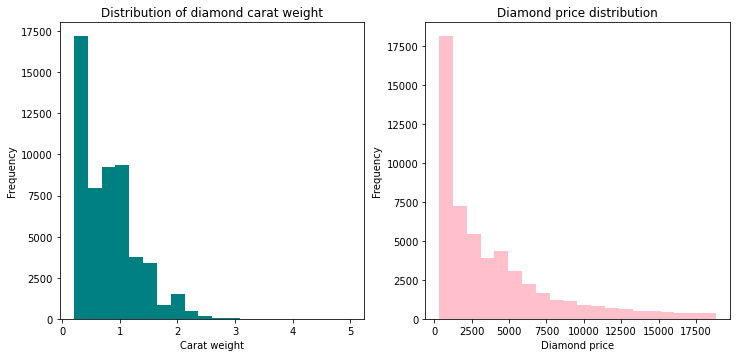

In [49]:
plt.figure(figsize=[12,12])

plt.subplot(221)
plt.hist(DF['carat'], bins=20,color='teal')
plt.xlabel("Carat weight")
plt.ylabel("Frequency")
plt.title("Distribution of diamond carat weight")

plt.subplot(222)
plt.hist(DF['price'], bins=20,color='pink')
plt.xlabel("Diamond price")
plt.ylabel("Frequency")
plt.title("Diamond price distribution");


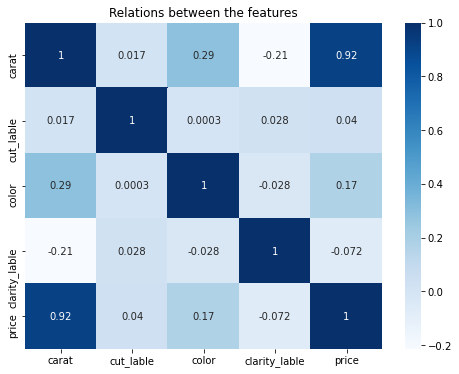

In [50]:
paycorr = DF[['carat', 'cut_lable', 'color', 'clarity_lable', 'price']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(paycorr, cmap='Blues', annot=True);
plt.title("Relations between the features");

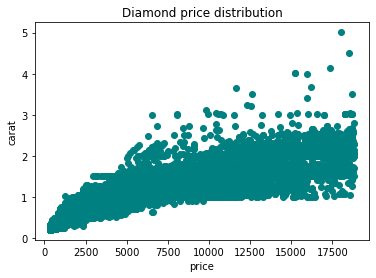

In [51]:
a = DF['price']
b = DF['carat']
plt.scatter(a, b, color='teal')
plt.xlabel("price")
plt.ylabel("carat")
plt.title("Diamond price distribution");
plt.show()

In [52]:
data = [
    go.Box(y=DF.price, name='price'),
   
]
fig = go.Figure(data=data)
fig.show()

In [53]:
data = [
    go.Box(y=DF.price, name='price'),
   
]
fig = go.Figure(data=data)
fig.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



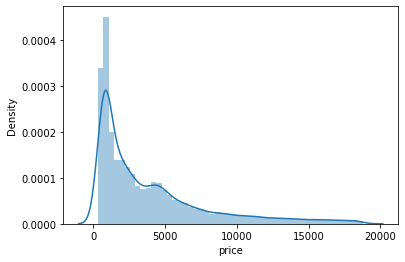

In [54]:
sns.distplot(DF['price'])
plt.show()

### Train_Test_Split

In [56]:
y=DF['price']
y.head()

0    326.0
1    326.0
2    327.0
3    334.0
4    335.0
Name: price, dtype: float64

In [57]:
X=DF.drop(['price', 'cut', 'clarity'],axis=1)
X.head(2)

,carat,color,cut_lable,clarity_lable
0,0.23,2,2,3
1,0.21,2,3,2


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
DF.head()

,carat,cut,color,clarity,price,cut_lable,clarity_lable
0,0.23,Ideal,2,SI2,326.0,2,3
1,0.21,Premium,2,SI1,326.0,3,2
2,0.23,Good,2,VS1,327.0,1,4
3,0.29,Premium,6,VS2,334.0,3,5
4,0.31,Good,7,SI2,335.0,1,3


### How to create a regression model to predict the price of diamonds? 
### Building our model

In [110]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=5)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('___________________\n')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

### Linear Regreesion model

In [112]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [113]:
# print the intercept
print(lin_reg.intercept_)

3939.490707267334


In [114]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
carat,3919.913389
color,-443.519772
cut_lable,76.786191
clarity_lable,535.955564


In [115]:
pred = lin_reg.predict(X_test)

In [116]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [117]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [118]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 939.755330230643
MSE: 1945184.79558171
RMSE: 1394.698818950425
R2 Square 0.8776368721542394
___________________

Train set evaluation:

MAE: 939.7003417075745
MSE: 1952559.019310507
RMSE: 1397.3399798583403
R2 Square 0.87734980763747
___________________



### Linear Regreesion model

In [130]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)


In [131]:

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 298.3071489552643
MSE: 353103.8106244202
RMSE: 594.2253870581601
R2 Square 0.9777877727502285
___________________

Train set evaluation:

MAE: 204.0350990782712
MSE: 145671.70484119555
RMSE: 381.6696278736305
R2 Square 0.9908496171209926
___________________



In [132]:
pred = rf_reg.predict(X_test)

In [133]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [134]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

## StandardScaler Method

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X)
pred= scaler.fit_transform(X_test)

### Polynomial Regreesion Algorithm

In [146]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures

In [147]:
#Polynomial
ML = LinearRegression()
poly = PolynomialFeatures(degree=2)

poly_train = poly.fit_transform(X)
cross_val_score(ML, poly_train, y, cv=5,scoring='r2')


array([ 0.08843064,  0.71449295,  0.84316037, -3.79007403, -0.25045408])

In [148]:
cross_val_score(ML, poly_train, y, cv=5,scoring='r2').max()

0.8431603672145382

### Ridge Regreesion Algorithm

In [64]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [65]:

from sklearn.model_selection import cross_val_score
rs = Ridge()

cross_val_score(rs, X, y, cv=5,scoring='r2')


array([ -0.3688616 ,   0.56147515,   0.76460836, -16.34695218,
        -1.26911214])

In [66]:
cross_val_score(rs, X, y, cv=5,scoring='r2').max()

0.7646083590456255

## Conclusion

- Random forest model able to predict the diamond price.
- it's depends strongly on the carat also clarity and the cut.